# Data & Things (RUC F2023)

## Hand-in Exercises for Exam

* This is a template for your exercise solutions. Each solution may use multiple cells. 

* Do your best to make your code clean and clear, e.g., by using comments and markdowns.

* Remeber to fill in the information of all your group members in the following cell.

## Group Members:
* [Rasmus Kjær Nielsen, 68910, rkjaern@ruc.dk]
* [name_2, student number, email_2]
* [Add more if needed]

## 0. Loading of common modules or initialization of other common things, if any

In [1]:
import pandas as pd
import numpy as np
import scratch.deep_learning as dl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

<Figure size 640x480 with 0 Axes>

## 1. EDA and data cleaning (Lecture 2 & 5)

Make an Exploratory Data Analysis (EDA) and data cleaning of the “titanic_survival_data.csv” dataset from Lectures 5 and 6, including dealing with outliers and missing values.

In [2]:
titanic = pd.read_csv("data/titanic.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic["Cabin"].fillna("Unknown", inplace=True)
titanic.dropna(subset=["Age"], inplace=True)

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [6]:
titanic["Sex"] = titanic.Sex.replace({'male':0, 'female':1})

## One-Hot Encoding

In [7]:
# Get all possible categories for the "PClass" column
print(f"Possible values for PClass: {titanic['Pclass'].unique()}")

# Use Pandas to One-Hot encode the PClass category
dataset_with_one_hot = pd.get_dummies(titanic, columns=["Pclass"], drop_first=False)

# Add back in the old Pclass column, for learning purposes
dataset_with_one_hot["Pclass"] = titanic.Pclass

# Print out the first few rows
dataset_with_one_hot.head()

Possible values for PClass: [3 1 2]


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,Pclass
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,S,0,0,1,3
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0,0,1,3
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,0,0,1
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,S,0,0,1,3


Same principle. We convert from cabin number and narrow it down to corresponding deck.

In [8]:
dataset_with_one_hot = pd.get_dummies(titanic, columns=["Pclass", "Cabin"], drop_first=False)

cabin_column_names = list(c for c in dataset_with_one_hot.columns if c.startswith("Cabin_"))

print(len(cabin_column_names), "cabins found")

135 cabins found


In [9]:
titanic["Deck"] = [c[0] for c in titanic.Cabin]

print("Decks: ", sorted(titanic.Deck.unique()))

dataset_with_one_hot = pd.get_dummies(titanic, columns=["Pclass", "Deck"], drop_first=False)

deck_of_cabin_column_names = list(c for c in dataset_with_one_hot.columns if c.startswith("Deck_"))



Decks:  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U']


In [10]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,S,U


## 2. Classification (Lecture 3 & 4)

Combine the exercise from Lecture 3 with exercise 2 from Lecture 4 into one, and construct some classification models to predict if a passenger would survive or not in the Titanic dataset. 

* a) You should have (1) decision tree, (2) random forest, and (3) KNN. You may also vary the configuration of each model type.
* b) You should do necessary data preprocessing (e.g., missing value fill-in, and data scaling if needed for a classifier). 
* c) You should also do cross-validation of your models.
* d) Plot the ROC with AUC for each model you implement.


## 3. Regression (Lecture 6)

Train a multiple linear regression, a random forest model, and an AdaBoost model on the “boston_housing_data.csv” dataset from Lectures 5 and 6 and remember to do train-test split as well as other necessary pre-processing dataset.

## 4. Clustering (Lecture 7 & 8)

Exercise 2 (both 2.1 and 2.2) from Lecture 7 and exercise 1 from Lecture 8.

## 5. Key-value stores (Lecture 9)

Exercise 1 from Lecture 9.

## 6. Deep learning (Lecture 10)

Train a deep neural network to predict if a passenger would survive or not in the Titanic dataset and remember to do train-test split as well as other necessary pre-processing dataset.

## Feature selection

We decide to use random forrest evaluation find the features that have the most influence towards survivability.

In [11]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,S,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,S,U


In [12]:
features = titanic.columns.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Deck', 'Embarked', 'PassengerId'])
features

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [13]:
X = titanic[features]
y = titanic['Survived']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [15]:
from sklearn.ensemble import RandomForestClassifier

#criterion='entropy', max_features=5, n_estimators=100, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0) 
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print("Accuracy of Random Forest: {}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of Random Forest: 0.8372093023255814


In [16]:
import numpy as np

def plot_feature_importances(model, features):
    n_features = len(features)
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

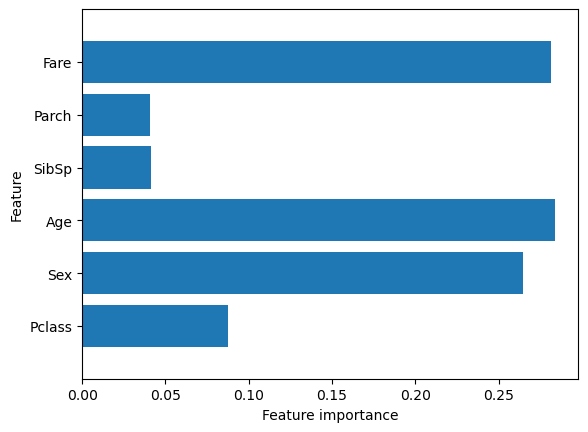

In [17]:
plot_feature_importances(forest, features)

This tells us that the features with most importance towards predicting survival is Fare, Sex and Age.

In [18]:
X = titanic[['Age', 'Fare', 'Sex']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [20]:
X_train = X_train.values.tolist()
X_train

[[24.0, 69.3, 1.0],
 [17.0, 7.125, 0.0],
 [34.0, 6.4958, 0.0],
 [18.0, 79.65, 1.0],
 [50.0, 106.425, 0.0],
 [27.0, 211.5, 0.0],
 [70.0, 71.0, 0.0],
 [20.0, 7.05, 0.0],
 [19.0, 14.5, 0.0],
 [1.0, 39.0, 0.0],
 [34.0, 21.0, 0.0],
 [63.0, 9.5875, 1.0],
 [20.0, 7.925, 0.0],
 [26.0, 18.7875, 0.0],
 [45.0, 26.55, 0.0],
 [33.0, 8.6542, 0.0],
 [45.0, 26.25, 1.0],
 [2.0, 26.0, 1.0],
 [50.0, 55.9, 0.0],
 [29.0, 21.075, 1.0],
 [22.0, 7.125, 0.0],
 [35.0, 53.1, 1.0],
 [39.0, 0.0, 0.0],
 [4.0, 16.7, 1.0],
 [17.0, 8.6625, 0.0],
 [0.42, 8.5167, 0.0],
 [1.0, 15.7417, 1.0],
 [32.0, 56.4958, 0.0],
 [51.0, 8.05, 0.0],
 [36.0, 26.0, 1.0],
 [36.0, 120.0, 0.0],
 [18.0, 6.75, 1.0],
 [0.75, 19.2583, 1.0],
 [18.0, 13.0, 1.0],
 [29.0, 7.75, 0.0],
 [36.0, 13.0, 1.0],
 [54.0, 51.8625, 0.0],
 [44.0, 90.0, 0.0],
 [65.0, 61.9792, 0.0],
 [42.0, 227.525, 1.0],
 [30.0, 24.0, 0.0],
 [39.0, 26.0, 0.0],
 [54.0, 78.2667, 1.0],
 [29.0, 27.7208, 0.0],
 [16.0, 10.5, 0.0],
 [55.0, 30.5, 0.0],
 [49.0, 76.7292, 1.0],
 [51.0, 77.9

In [21]:
X_test = X_test.values.tolist()

In [22]:
y_train

641    1
433    0
202    0
585    1
544    0
      ..
179    0
808    0
93     0
291    1
51     0
Name: Survived, Length: 499, dtype: int64

In [23]:
y_train_oh = [dl.one_hot_encode(y, 2) for y in y_train]
y_train_oh

[[0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],

In [24]:
y_test_oh = [dl.one_hot_encode(y, 2) for y in y_test]

In [25]:
import random
random.seed(0)
    
# Name them so we can turn train on and off
dropout1 = dl.Dropout(0.1)
dropout2 = dl.Dropout(0.1)
dropout3 = dl.Dropout(0.1)
    
t_model = dl.Sequential([
    dl.Linear(3, 32),  # Hidden layer 1: size 32
    dropout1,
    dl.Tanh(),
    dl.Linear(32, 16),   # Hidden layer 2: size 16
    dropout2,
    dl.Tanh(),
    dl.Linear(16, 8),   # Hidden layer 3: size 8
    dropout3,
    dl.Tanh(),
    dl.Linear(8, 2)    # Output layer: size 2
])

In [26]:
from numpy import argmax
import tqdm
def loop(model: dl.Layer,
             images: dl.List[dl.Tensor],
             labels: dl.List[dl.Tensor],
             loss: dl.Loss,
             optimizer: dl.Optimizer = None) -> None:
        correct = 0         # Track number of correct predictions.
        total_loss = 0.0    # Track total loss.
    
        with tqdm.trange(len(images)) as t:
            for i in t:
                predicted = model.forward(images[i])             # Predict.
                if argmax(predicted) == argmax(labels[i]):       # Check for
                    correct += 1                                 # correctness.
                total_loss += loss.loss(predicted, labels[i])    # Compute loss.
    
                # If we're training, backpropagate gradient and update weights.
                if optimizer is not None:
                    gradient = loss.gradient(predicted, labels[i])
                    model.backward(gradient)
                    optimizer.step(model)
    
                # And update our metrics in the progress bar.
                avg_loss = total_loss / (i + 1)
                acc = correct / (i + 1)
                t.set_description(f"mnist loss: {avg_loss:.3f} acc: {acc:.3f}")

In [27]:
from scratch.deep_learning import main
optimizer = dl.Momentum(learning_rate=0.01, momentum=0.99)
loss = dl.SoftmaxCrossEntropy()
    
# Enable dropout and train (takes > 20 minutes on my laptop!)
dropout1.train = dropout2.train = dropout3.train = True
loop(t_model, X_train, y_train_oh, loss, optimizer)

mnist loss: 0.675 acc: 0.587: 100%|██████████| 499/499 [00:00<00:00, 1081.14it/s]


In [28]:
# Disable dropout and evaluate
dropout1.train = dropout2.train = dropout3.train = False
loop(t_model, X_test, y_test_oh, loss)

mnist loss: 0.633 acc: 0.623: 100%|██████████| 215/215 [00:00<00:00, 1882.77it/s]


In [29]:
y_pred = [t_model.forward(x) for x in X_test]
y_pred

[[0.30002447136589044, 0.1555800142473189],
 [0.3103966983946365, 0.13230022522338208],
 [0.4369541046131727, -0.00454548363631066],
 [0.324797928102504, 0.12066359483963987],
 [0.48201227191616375, -0.06424555832049575],
 [0.5175036435453675, -0.09732614056127281],
 [0.4611638224402064, -0.03792938498402759],
 [0.5130388118694589, -0.09040517326177946],
 [0.5138789863556682, -0.0938641501121979],
 [0.4732423099555715, -0.05135622630135353],
 [0.39952516111384645, 0.039624993546725676],
 [0.4810745223010457, -0.06223095108585516],
 [0.525280822584933, -0.1054604667798385],
 [0.525190688724569, -0.10413298147772629],
 [0.5106143917399673, -0.09190190599427162],
 [0.3203381398048842, 0.11341492855737705],
 [0.47520702021575667, -0.05267252549005333],
 [0.4885995601049169, -0.07157751859537995],
 [0.5097995774323234, -0.09181374887068391],
 [0.5251157598610503, -0.10490057276156822],
 [0.4736807672640183, -0.05580037450040251],
 [0.5312934469548424, -0.10945671491032077],
 [0.307745237604

In [30]:
dl.softmax(y_pred)

[[0.5360484592050708, 0.4639515407949291],
 [0.5444068044012288, 0.45559319559877115],
 [0.6086162945414282, 0.3913837054585718],
 [0.5508571010644228, 0.44914289893557724],
 [0.6332669440127195, 0.36673305598728057],
 [0.6490417523361469, 0.35095824766385303],
 [0.6222462079286373, 0.3777537920713626],
 [0.6464438399128323, 0.3535561600871678],
 [0.6474258092699093, 0.3525741907300907],
 [0.6282224276491088, 0.3717775723508911],
 [0.5890162672270277, 0.4109837327729723],
 [0.6325810195094544, 0.36741898049054555],
 [0.6526575282999026, 0.3473424717000973],
 [0.6523360906526599, 0.34766390934734015],
 [0.6462317842669141, 0.35376821573308587],
 [0.5515470089820834, 0.44845299101791664],
 [0.6289884140278108, 0.37101158597218914],
 [0.6364935118858516, 0.3635064881141485],
 [0.6460253230629064, 0.35397467693709356],
 [0.6524931655561126, 0.3475068344438874],
 [0.6293620883934297, 0.37063791160657045],
 [0.6549230160293184, 0.3450769839706816],
 [0.5417880195620884, 0.45821198043791156],

In [31]:
y_pred_binary = [1 if x[1] > 0.5 else 0 for x in dl.softmax(y_pred)]
y_pred_binary

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [32]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_binary))
print("Recall:", metrics.recall_score(y_test, y_pred_binary))
print("Precision:", metrics.precision_score(y_test, y_pred_binary))
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_binary))

Accuracy: 0.6232558139534884
Recall: 0.0
Precision: 0.0
Confusion matrix:
[[134   0]
 [ 81   0]]


c:\Users\rasmu\Documents\Dev\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
optimizer = dl.Momentum(learning_rate=0.001, momentum=0.99)

dropout1.train = dropout2.train = dropout3.train = True

for _ in range(15):
    loop(t_model, X_train, y_train_oh, loss, optimizer)

mnist loss: 0.616 acc: 0.675: 100%|██████████| 499/499 [00:00<00:00, 1034.31it/s]


In [34]:
dropout1.train = dropout2.train = False
loop(t_model, X_test, y_test_oh, loss)

mnist loss: 0.595 acc: 0.702: 100%|██████████| 215/215 [00:00<00:00, 2043.18it/s]


In [35]:
y_pred = [t_model.forward(x) for x in X_test]
y_pred_binary = [1 if x[1] > 0.5 else 0 for x in dl.softmax(y_pred)]

In [36]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_binary))
print("Recall:", metrics.recall_score(y_test, y_pred_binary))
print("Precision:", metrics.precision_score(y_test, y_pred_binary))
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_binary))

Accuracy: 0.7116279069767442
Recall: 0.6049382716049383
Precision: 0.620253164556962
Confusion matrix:
[[104  30]
 [ 32  49]]


## Keras

In [37]:
from tensorflow import keras
from tensorflow.keras import layers

In [38]:
keras_model = keras.Sequential(
    [
        keras.Input(shape=(3)),  # As we have 3 columns in our input data X
        layers.Dense(32, activation='tanh'),
        layers.Dropout(0.1),
        layers.Dense(16, activation='tanh'),
        layers.Dropout(0.1),
        layers.Dense(8, activation='tanh'),
        layers.Dropout(0.1),
        layers.Dense(2, activation="softmax")  # Here we specify that we want the last layer to have a softmax activation function
    ]
)

In [39]:
keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                128       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 2)                 1

In [40]:
keras_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [41]:
X_train_keras = np.array(X_train)
X_train_keras.shape

(499, 3)

In [42]:
y_train_keras = np.array(y_train_oh)
y_train_keras.shape

(499, 2)

In [43]:
keras_model.fit(X_train_keras, y_train_keras, batch_size=1, epochs=16)

Epoch 1/16
499/499 [==============================] - 1s 547us/step - loss: 0.6732 - accuracy: 0.6052
Epoch 2/16
499/499 [==============================] - 0s 509us/step - loss: 0.6253 - accuracy: 0.6613
Epoch 3/16
499/499 [==============================] - 0s 512us/step - loss: 0.6094 - accuracy: 0.6794
Epoch 4/16
499/499 [==============================] - 0s 504us/step - loss: 0.5954 - accuracy: 0.6994
Epoch 5/16
499/499 [==============================] - 0s 510us/step - loss: 0.5653 - accuracy: 0.7255
Epoch 6/16
499/499 [==============================] - 0s 506us/step - loss: 0.5541 - accuracy: 0.7174
Epoch 7/16
499/499 [==============================] - 0s 508us/step - loss: 0.5551 - accuracy: 0.7234
Epoch 8/16
499/499 [==============================] - 0s 503us/step - loss: 0.5575 - accuracy: 0.7154
Epoch 9/16
499/499 [==============================] - 0s 504us/step - loss: 0.5529 - accuracy: 0.7655
Epoch 10/16
499/499 [==============================] - 0s 505us/step - loss: 0.533

In [44]:
score = keras_model.evaluate(np.array(X_test), np.array(y_test_oh), verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.4928498864173889
Test accuracy: 0.7953488230705261


In [45]:
y_pred_keras = keras_model.predict(np.array(X_test))
y_pred_keras

7/7 [==============================] - 0s 667us/step


array([[0.1558196 , 0.8441804 ],
       [0.5646717 , 0.43532827],
       [0.23845649, 0.7615435 ],
       [0.16399644, 0.8360035 ],
       [0.8584647 , 0.14153528],
       [0.87188154, 0.12811843],
       [0.25275213, 0.7472478 ],
       [0.8621902 , 0.13780983],
       [0.8705577 , 0.1294423 ],
       [0.8433284 , 0.15667161],
       [0.76236856, 0.2376315 ],
       [0.8551052 , 0.14489476],
       [0.87291175, 0.12708819],
       [0.8739436 , 0.12605643],
       [0.86966574, 0.13033424],
       [0.49986342, 0.5001366 ],
       [0.843657  , 0.15634304],
       [0.8628675 , 0.13713247],
       [0.86925465, 0.1307454 ],
       [0.8731839 , 0.12681611],
       [0.85369396, 0.14630604],
       [0.87503254, 0.12496743],
       [0.57829726, 0.42170268],
       [0.8658035 , 0.13419653],
       [0.8682965 , 0.13170356],
       [0.86650616, 0.13349389],
       [0.873341  , 0.12665902],
       [0.3284135 , 0.6715865 ],
       [0.5834353 , 0.41656473],
       [0.8401019 , 0.15989812],
       [0.

In [46]:
y_pred_keras_binary = [1 if x[1] > 0.5 else 0 for x in y_pred_keras]
y_pred_keras_binary

[1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1]

In [47]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_keras_binary))
print("Recall:", metrics.recall_score(y_test, y_pred_keras_binary))
print("Precision:", metrics.precision_score(y_test, y_pred_keras_binary))
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_keras_binary))

Accuracy: 0.7953488372093023
Recall: 0.7654320987654321
Precision: 0.7126436781609196
Confusion matrix:
[[109  25]
 [ 19  62]]


## 7. MapReduce (Lecture 13)

All exercises from Lecture 13.

## 8. Time Series Analysis (Lecture 14 & 15)

Do a time series analysis of the Copenhagen ice cream dataset ("cph_ice_cream_searches.csv") from Lectures 14 and 15.

## 9. IoT (Lecture 17)

All exercises from Lecture 17.